In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
data = pd.read_csv('roo_data.csv')
data.head()
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Drop unwanted columns
data.drop(labels=['can work long time before system?','Taken inputs from seniors or elders','talenttests taken?','interested in games','Salary Range Expected','In a Realtionship?','worked in teams ever?','self-learning capability?','Salary/work','hard/smart worker','Introvert','Interested Type of Books','Gentle or Tuff behaviour?'],axis=1, inplace=True)

# one -hot encoding, drop extra columns and concatinate it with original data
def one_hot_encoding_data(data,string_columns):
  string_data = pd.get_dummies(data[string_columns])
  data.drop(labels=string_columns, axis=1, inplace=True)
  df = pd.concat([data, string_data], axis = 1)
  return df


# convert string columns to numerical using one-hot encoding
string_columns = ['interested career area ','Extra-courses did','certifications','workshops','olympiads','reading and writing skills','memory capability score','Interested subjects','Job/Higher Studies?','Type of company want to settle in?','Management or Technical']
df = one_hot_encoding_data(data=data,string_columns=string_columns)
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Type of company want to settle in?_Finance,Type of company want to settle in?_Product based,Type of company want to settle in?_SAaS services,Type of company want to settle in?_Sales and Marketing,Type of company want to settle in?_Service Based,Type of company want to settle in?_Testing and Maintainance Services,Type of company want to settle in?_Web Services,Type of company want to settle in?_product development,Management or Technical_Management,Management or Technical_Technical
0,69,63,78,87,94,94,87,84,61,9,...,0,0,0,0,0,0,1,0,1,0
1,78,62,73,60,71,70,73,84,91,12,...,0,0,1,0,0,0,0,0,0,1
2,71,86,91,87,61,81,72,72,94,11,...,0,0,0,1,0,0,0,0,1,0
3,76,87,60,84,89,73,62,88,69,7,...,0,0,0,0,0,1,0,0,1,0
4,92,62,90,67,71,89,73,71,73,4,...,0,0,0,0,0,0,0,1,1,0


In [4]:
# map labels to index & vice-versa
label_index = dict()
index_label = dict()
# job_role_map = {'Developer':1,'Engineer':1,'UX':1,'Designer':1,
#             'Manager':2,'Administrator':2,
#             'Auditor':3,
#             'Associate':4,
#             'Architect':5,
#             'Support':6,
#             'Testing':7,
#             'Analyst':8,
#             }
job_role_map = {
                'Analyst':1,
                'Manager':2,
                'Auditor':3,
                'Associate':4,  'Architect':5,
                'Administrator':6, 'Support':7,
                'Developer':0,'UX':0,'Testing':0,
                'Engineer':0,'Designer':0
                }
for i, x in enumerate(df['Suggested Job Role'].unique()):
    temp =  str(x).split()
    label_index[x] = job_role_map[temp[-1]]

print('----------------Label index mapping--------------------')
print(label_index)
print()
# update jobs labels in data to index
df['Suggested Job Role'] = [label_index[l] for l in df['Suggested Job Role']]
print("-------------Label and its frequency-------------------------")
df['Suggested Job Role'].value_counts()


----------------Label index mapping--------------------
{'Database Developer': 0, 'Portal Administrator': 6, 'Systems Security Administrator': 6, 'Business Systems Analyst': 1, 'Software Systems Engineer': 0, 'Business Intelligence Analyst': 1, 'CRM Technical Developer': 0, 'Mobile Applications Developer': 0, 'UX Designer': 0, 'Quality Assurance Associate': 4, 'Web Developer': 0, 'Information Security Analyst': 1, 'CRM Business Analyst': 1, 'Technical Support': 7, 'Project Manager': 2, 'Information Technology Manager': 2, 'Programmer Analyst': 1, 'Design & UX': 0, 'Solutions Architect': 5, 'Systems Analyst': 1, 'Network Security Administrator': 6, 'Data Architect': 5, 'Software Developer': 0, 'E-Commerce Analyst': 1, 'Technical Services/Help Desk/Tech Support': 7, 'Information Technology Auditor': 3, 'Database Manager': 2, 'Applications Developer': 0, 'Database Administrator': 6, 'Network Engineer': 0, 'Software Engineer': 0, 'Technical Engineer': 0, 'Network Security Engineer': 0, 'So

0    8115
1    3874
6    2860
2    1763
5    1142
7    1123
4     565
3     558
Name: Suggested Job Role, dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
#Split data into X and Y
X = df.drop(columns='Suggested Job Role')
Y = pd.DataFrame(df['Suggested Job Role'])
scaler= StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:

def normalize_data(xtrain,xtest):
    min_max_scaler = MinMaxScaler()
    xtrain = min_max_scaler.fit_transform(xtrain)
    xtest = min_max_scaler.fit_transform(xtest)

    return xtrain,xtest
# train test split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify=Y)

# normalise the data using min-max scaler
xtrain,xtest = normalize_data(xtrain,xtest)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, classification_report

# Printing the reports regarding any model
def model_assess(model,xtrain, xtest, ytrain, ytest,title = "Default"):
    y_pred = model.predict(xtest)
    print(title, ':')
    # # predict classes on testing data
    cm = confusion_matrix(ytest, y_pred)

    # # plotting conf matrix using seaborn
    plt.figure(figsize = (10,7))
    mask = np.triu(np.ones_like(cm, dtype=np.bool))
    sns.heatmap(cm, mask=mask, vmax=30, center=0,annot=True)
    # plt.savefig("")

    # Predict accuracy,precision_score,recall_score
    print(f"Accuracy score: {accuracy_score(ytest, y_pred)}")
    print(f"Overall Precision: {precision_score(ytest, y_pred,average='weighted')}")
    print(f"Overall Recall:{recall_score(ytest, y_pred,average='weighted')}")
    # Print classification Report
    print(classification_report(ytest, y_pred))

MLP without GridsearchCV :
Accuracy score: 0.30275
Overall Precision: 0.23611365708356202
Overall Recall:0.30275
              precision    recall  f1-score   support

           0       0.41      0.60      0.49      1623
           1       0.19      0.21      0.20       775
           2       0.07      0.03      0.05       352
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00       113
           5       0.08      0.02      0.03       228
           6       0.14      0.10      0.12       572
           7       0.06      0.02      0.03       225

    accuracy                           0.30      4000
   macro avg       0.12      0.12      0.11      4000
weighted avg       0.24      0.30      0.26      4000



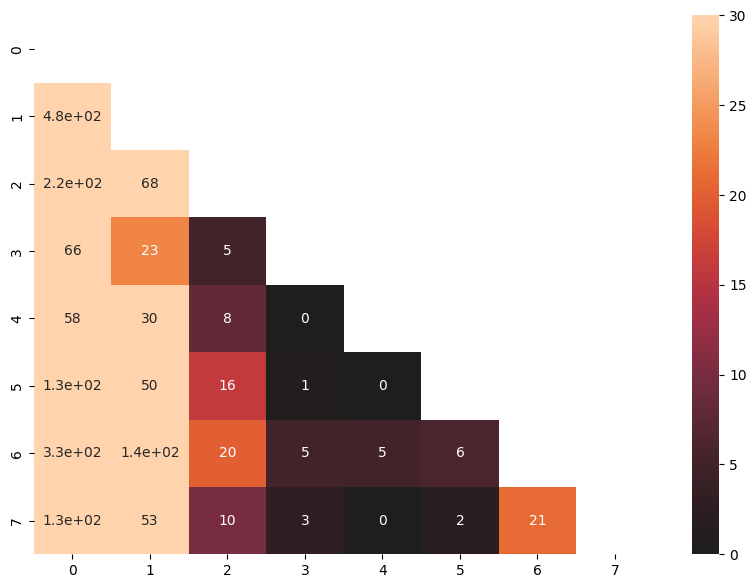

In [8]:
def model_def(xtrain, xtest, ytrain, ytest):
    mlp_model =MLPClassifier()
    ytrain = ytrain.values.reshape(-1,)
    mlp_model.fit(xtrain,ytrain)
    model_assess(mlp_model,xtrain, xtest, ytrain, ytest,"MLP without GridsearchCV")

model_def(xtrain, xtest, ytrain, ytest)

MLP with hyperparameter tuning :
Accuracy score: 0.40025
Overall Precision: 0.23260556612401684
Overall Recall:0.40025
              precision    recall  f1-score   support

           0       0.41      0.97      0.57      1623
           1       0.21      0.02      0.04       775
           2       0.00      0.00      0.00       352
           3       0.00      0.00      0.00       112
           4       0.00      0.00      0.00       113
           5       0.00      0.00      0.00       228
           6       0.18      0.02      0.04       572
           7       0.00      0.00      0.00       225

    accuracy                           0.40      4000
   macro avg       0.10      0.13      0.08      4000
weighted avg       0.23      0.40      0.25      4000



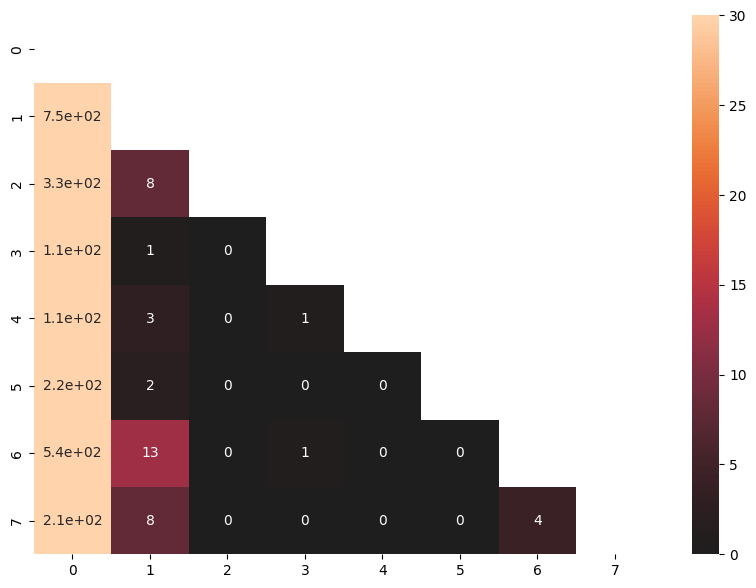

In [9]:
# Model after gridsearch
def model_gs(xtrain, xtest, ytrain, ytest):
    model_better =MLPClassifier(alpha =1e-05,hidden_layer_sizes=10,max_iter=1300,solver= 'lbfgs' )
    ytrain = ytrain.values.reshape(-1,)
    model_better.fit(xtrain,ytrain)
    model_assess(model_better,xtrain, xtest, ytrain, ytest,"MLP with hyperparameter tuning")

model_gs(xtrain, xtest, ytrain, ytest)

In [10]:
# from sklearn.model_selection import GridSearchCV
# params_mlp = {
#         'hidden_layer_sizes': [8,10,12,24,48],
#         'alpha': [10.0 ** -np.arange(3, 7)],
#         'activation': ["relu", "Tanh"],
#         'solver': ['lbfgs','sgd','adam'],
#         'max_iter': [1250,1500,1750,3000 ],
#         }                                     #setting param grid
# model_mlp = MLPClassifier()
# gs_KNN=GridSearchCV(estimator=model_mlp,
#                     param_grid=params_mlp,
#                    n_jobs=-1,verbose=2,cv=10)
# gs_KNN.fit(xtrain,ytrain)
# print(gs_KNN.best_params_)


-----------Test data split is 10%-------
Model without HP :
Accuracy score: 0.315
Overall Precision: 0.2388637534262671
Overall Recall:0.315
              precision    recall  f1-score   support

           0       0.40      0.65      0.50       812
           1       0.18      0.16      0.17       387
           2       0.14      0.06      0.09       176
           3       0.08      0.02      0.03        56
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00       114
           6       0.15      0.09      0.11       286
           7       0.09      0.03      0.04       112

    accuracy                           0.32      2000
   macro avg       0.13      0.13      0.12      2000
weighted avg       0.24      0.32      0.26      2000

Accuracy without HP tuning is  0.315
-----------Test data split is 20%-------
Model without HP :
Accuracy score: 0.2965
Overall Precision: 0.24101948291337538
Overall Recall:0.2965
              precision    

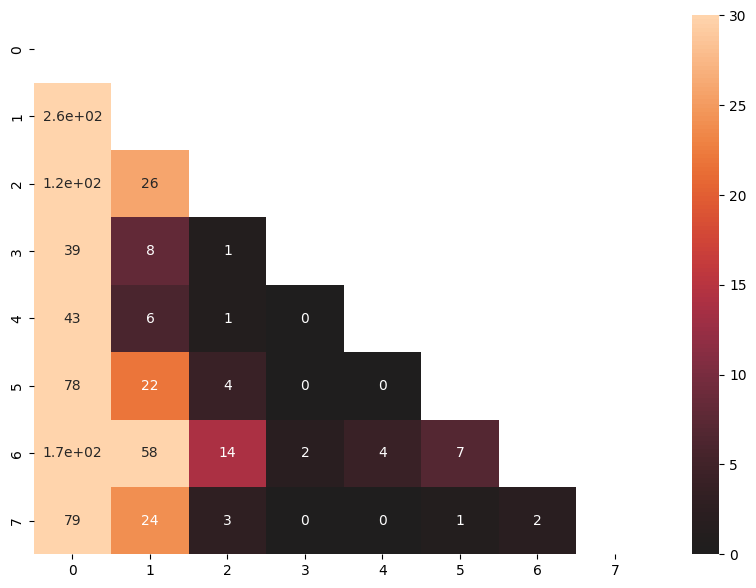

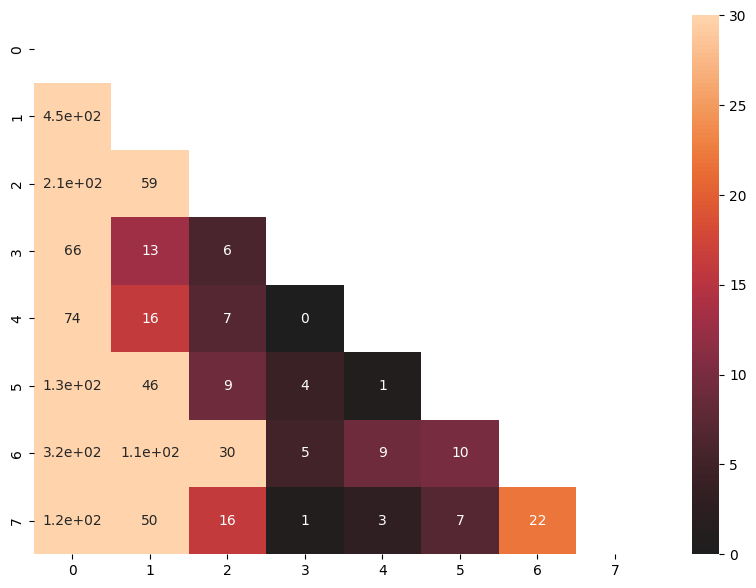

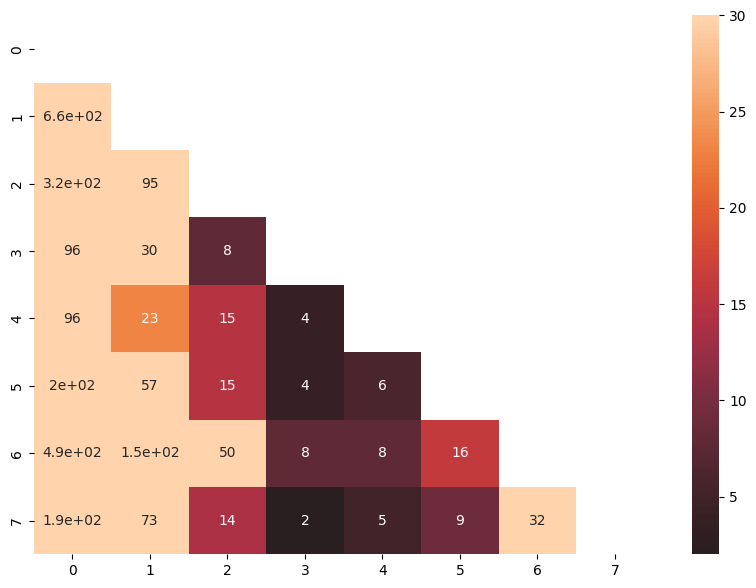

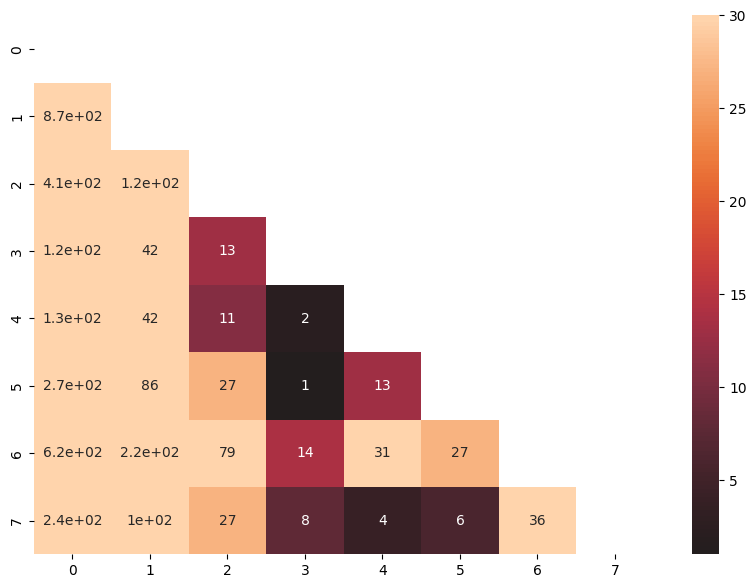

In [11]:
from sklearn.neural_network import MLPClassifier
def no_hp(xtrain, xtest, ytrain, ytest):
    mlp_model =MLPClassifier()
    ytrain = ytrain.values.reshape(-1,)
    mlp_model.fit(xtrain,ytrain)
    ypred=mlp_model.predict(xtest)
    model_assess(mlp_model,xtrain, xtest, ytrain, ytest,"Model without HP")
    acc = mlp_model.score(xtest,ytest)
    return acc


for i in range(1,5):
    print('-----------Test data split is {}%-------'.format(i*10))
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size = 0.1*i,random_state = 1,stratify=Y)
    score = no_hp(xtrain, xtest, ytrain, ytest)
    print('Accuracy without HP tuning is ', score)